In [1]:
%matplotlib inline
from preprocessor import *
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

epl = pd.read_csv('~/Documents/datasets/football/E0.csv')
print(epl.columns)
#Reduce the number of columns to ease EDA
columns = [ 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'B365H', 'B365D', 'B365A']
data = epl[columns]
data.head()

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH',
       'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5',
       'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH',
       'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,B365H,B365D,B365A
0,Arsenal,Leicester,4,3,H,2,2,D,1.53,4.5,6.50
1,Brighton,Man City,0,2,A,0,0,D,11.00,5.5,1.33
2,Chelsea,Burnley,2,3,A,0,3,A,1.25,6.5,15.00
3,Crystal Palace,Huddersfield,0,3,A,0,2,A,1.83,3.6,5.00
4,Everton,Stoke,1,0,H,1,0,H,1.70,3.8,5.75


In [2]:

data['total_goals'] = data['FTHG'] + data['FTAG']
data['HT_total_goals'] = data['HTHG'] + data['HTAG']
data['over_point_five'] = data['total_goals'].apply(lambda x: x > 0) #from previous lesson
data['over_one_point_five'] = data['total_goals'].apply(lambda x: x > 1)
data['second_half_goals'] = data['total_goals'] - data['HT_total_goals']

best = ['Arsenal','Man United','Chelsea','Man City','Liverpool','Tottenham','Everton','Watford','Leicester']
top_ten = data[data.HomeTeam.isin(best) | data.AwayTeam.isin(best)] 
away_top_ten = data[data.AwayTeam.isin(best)]
away_top_ten['HomeWin'] = away_top_ten['FTHG'] > away_top_ten['FTAG']


In [3]:
data.isnull().sum()
cat_features = ['HomeTeam','AwayTeam','FTR','HTR']
num_features = ['FTHG', 'FTAG', 'HTHG', 'HTAG',
     'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A']
drop_features = ['FTHG', 'FTAG','HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC','HY', 'AY', 'HR', 'AR']

In [4]:
arsenal = data.loc[(data['HomeTeam'] == 'Arsenal') | (data['AwayTeam'] == 'Arsenal')]
manutd = data.loc[(data['HomeTeam'] == 'Man United') | (data['AwayTeam'] == 'Man United')]
liverpool = data.loc[(data['HomeTeam'] == 'Liverpool') | (data['AwayTeam'] == 'Liverpool')]

In [6]:
manutd.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,B365H,B365D,B365A,total_goals,HT_total_goals,over_point_five,over_one_point_five,second_half_goals
8,Man United,West Ham,4,0,H,1,0,H,1.30,5.75,12.00,4,1,True,True,3
16,Swansea,Man United,0,4,A,0,1,A,11.00,5.00,1.36,4,1,True,True,3
23,Man United,Leicester,2,0,H,0,0,D,1.33,5.50,11.00,2,0,True,True,2
36,Stoke,Man United,2,2,D,1,1,D,7.50,4.50,1.50,4,2,True,True,2
49,Man United,Everton,4,0,H,1,0,H,1.36,5.25,10.00,4,1,True,True,3


In [10]:
arsenal.loc[(arsenal['HomeTeam'] == 'Arsenal' & arsenal['FTR'] == 'H') | (arsenal['AwayTeam'] == 'Arsenal' & data['FTR'] == 'A'),'Result'] = 'W'
arsenal.loc[(arsenal['HomeTeam'] == 'Arsenal' & arsenal['FTR'] == 'A') | (arsenal['AwayTeam'] == 'Arsenal' & data['FTR'] == 'H'),'Result'] = 'L'
arsenal.loc[arsenal['FTR'] == 'D','Result'] = 'D'


TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

In [47]:
equal_odds = data.loc[(data['B365H'] == data['B365A'])]
equal_odds = data.loc[(data['B365H'] == data['B365A'])]
draws = data.loc[(data['FTR'] == 'D')]
favoured_team_home = data.loc[(data['B365H'] < data['B365A'])]
favoured_team_away = data.loc[(data['B365H'] > data['B365A'])]

''' 
Let's investigate the nine possibilities in a game i.e 

HH,HD,HA,
DH,DD,DA,
AH,AD,AA
'''
# Win half time for home team, win full time for home team
HH = data.loc[(data['HTR'] == 'H') & (data['FTR'] == 'H')]

# Win half time for home team, draw full time 
HD = data.loc[(data['HTR'] == 'H') & (data['FTR'] == 'D')]

# Win half time for home team, win full time for away team
HA = data.loc[(data['HTR'] == 'H') & (data['FTR'] == 'A')]


# Draw half time, win full time for home team
DH = data.loc[(data['HTR'] == 'D') & (data['FTR'] == 'H')]

# Draw half time , draw full time 
DD = data.loc[(data['HTR'] == 'D') & (data['FTR'] == 'D')]


# Draw half time, win full time for away team
DA = data.loc[(data['HTR'] == 'D') & (data['FTR'] == 'A')]

# Win half time for away team, win full time for home team
AH = data.loc[(data['HTR'] == 'A') & (data['FTR'] == 'H')]

# Win half time for away team, draw full time
AD = data.loc[(data['HTR'] == 'A') & (data['FTR'] == 'D')]

# Win half time for home team, win full time for home team
AA = data.loc[(data['HTR'] == 'A') & (data['FTR'] == 'A')]

#Investigating first half double chance
DC1 = data.loc[(data['HTR'] != 'D') ]
DHT = data.loc[(data['HTR'] == 'D') ]

data['equal_halves'] = ( data['HT_total_goals']) == (data['second_half_goals'])
data['first_half_more_goals'] = ( data['HT_total_goals']) > (data['second_half_goals'])
data['second_half_more_goals'] = ( data['HT_total_goals']) < (data['second_half_goals'])
out_of_the_money = data.loc[((data['FTR'] == 'A') & (data['B365A'] > data['B365H'])) | ((data['FTR'] == 'H') & (data['B365A'] < data['B365H']))]
at_the_money = data.loc[(data['FTR'] == 'A') & (data['B365A'] > data['B365H'])]

In [52]:
out_of_the_money.shape

(71, 19)

In [59]:

out_of_the_money.loc[(out_of_the_money['equal_halves'] == True)].shape[0]

7

In [14]:
equal_odds

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
14/10/17,Liverpool,Man United,0,0,D,0,0,D,19,6,...,13,7,3,0,2,0,0,2.80,3.25,2.80
25/11/17,Swansea,Bournemouth,0,0,D,0,0,D,10,9,...,6,4,5,4,2,0,0,2.79,3.25,2.79
03/01/18,Arsenal,Chelsea,2,2,D,0,0,D,14,19,...,11,10,8,3,2,0,0,2.60,3.39,2.60
10/03/18,Man United,Liverpool,2,1,H,2,0,H,5,14,...,16,1,13,2,1,0,0,2.75,3.39,2.75
10/03/18,Newcastle,Southampton,3,0,H,2,0,H,7,6,...,10,2,6,0,2,0,0,2.79,3.20,2.79


In [15]:
draws.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
12/08/17,Southampton,Swansea,0,0,D,0,0,D,29,4,...,13,13,0,2,1,0,0,1.62,4.00,6.50
12/08/17,Watford,Liverpool,3,3,D,2,1,H,9,14,...,8,3,3,0,3,0,0,6.00,4.20,1.62
21/08/17,Man City,Everton,1,1,D,0,1,A,19,7,...,9,7,1,1,2,1,1,1.33,5.75,10.00
26/08/17,Huddersfield,Southampton,0,0,D,0,0,D,16,6,...,10,5,4,0,1,0,0,3.90,3.40,2.10
26/08/17,Watford,Brighton,0,0,D,0,0,D,8,16,...,18,3,11,0,1,1,0,1.91,3.40,4.00


In [16]:
data.shape

(380, 23)

In [17]:
favoured_team_home.head(10)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
11/08/17,Arsenal,Leicester,4,3,H,2,2,D,27,6,...,12,9,4,0,1,0,0,1.53,4.50,6.50
12/08/17,Chelsea,Burnley,2,3,A,0,3,A,19,10,...,11,8,5,3,3,2,0,1.25,6.50,15.00
12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,14,8,...,19,12,9,1,3,0,0,1.83,3.60,5.00
12/08/17,Everton,Stoke,1,0,H,1,0,H,9,9,...,10,6,7,1,1,0,0,1.70,3.80,5.75
12/08/17,Southampton,Swansea,0,0,D,0,0,D,29,4,...,13,13,0,2,1,0,0,1.62,4.00,6.50
12/08/17,West Brom,Bournemouth,1,0,H,1,0,H,16,9,...,3,8,2,3,1,0,0,2.40,3.30,3.30
13/08/17,Man United,West Ham,4,0,H,1,0,H,22,9,...,7,11,1,2,2,0,0,1.30,5.75,12.00
19/08/17,Bournemouth,Watford,0,2,A,0,0,D,6,19,...,14,8,5,1,3,0,0,2.00,3.60,4.00
19/08/17,Burnley,West Brom,0,1,A,0,0,D,20,8,...,11,5,5,1,0,0,1,2.63,3.20,3.00


In [18]:
favoured_team_away.tail(10)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
29/04/18,West Ham,Man City,1,4,A,1,2,A,4,19,...,11,0,7,0,1,0,0,10.00,5.75,1.33
04/05/18,Brighton,Man United,1,0,H,0,0,D,11,16,...,3,5,6,2,0,0,0,4.75,3.60,1.85
05/05/18,Everton,Southampton,1,1,D,0,0,D,9,11,...,12,3,4,2,4,0,1,2.89,3.29,2.62
05/05/18,West Brom,Tottenham,1,0,H,0,0,D,9,18,...,12,5,9,4,1,0,0,8.00,4.75,1.44
08/05/18,Swansea,Southampton,0,1,A,0,0,D,11,13,...,15,7,6,2,1,0,0,3.10,3.25,2.54
09/05/18,Leicester,Arsenal,3,1,H,1,0,H,19,14,...,12,6,6,2,2,0,1,3.75,3.79,2.00
10/05/18,West Ham,Man United,0,0,D,0,0,D,9,16,...,12,1,6,1,1,0,0,4.75,3.79,1.80
13/05/18,Huddersfield,Arsenal,0,1,A,0,1,A,18,9,...,7,7,4,1,0,0,0,6.00,4.33,1.60
13/05/18,Newcastle,Chelsea,3,0,H,1,0,H,16,6,...,10,4,2,0,1,0,0,6.50,4.20,1.60


In [19]:
HH.shape

(103, 23)

In [20]:
HD.shape

(12, 23)

In [21]:
HA.shape

(9, 23)

In [22]:
DH.shape

(61, 23)

In [23]:
DD.shape

(67, 23)

In [24]:
DA.shape

(34, 23)

In [25]:
AH.shape

(9, 23)

In [26]:
AD.shape
AD

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
21/08/17,Man City,Everton,1,1,D,0,1,A,19,7,...,9,7,1,1,2,1,1,1.33,5.75,10.00
14/10/17,Burnley,West Ham,1,1,D,0,1,A,20,8,...,14,7,4,2,2,0,1,2.75,3.25,2.80
15/10/17,Southampton,Newcastle,2,2,D,0,1,A,12,19,...,12,3,8,1,2,0,0,1.91,3.60,4.50
28/10/17,Crystal Palace,West Ham,2,2,D,0,2,A,19,6,...,15,11,2,1,2,0,0,2.39,3.29,3.29
29/10/17,Brighton,Southampton,1,1,D,0,1,A,7,6,...,10,2,7,3,1,0,0,3.29,3.20,2.45
20/11/17,Brighton,Stoke,2,2,D,1,2,A,9,13,...,5,6,7,1,0,0,0,2.39,3.20,3.39
25/11/17,Tottenham,West Brom,1,1,D,0,1,A,24,5,...,13,8,0,1,4,0,0,1.25,6.00,16.00
22/12/17,Arsenal,Liverpool,3,3,D,0,1,A,11,14,...,11,7,8,1,0,0,0,2.54,3.60,2.79
26/12/17,Man United,Burnley,2,2,D,0,2,A,23,3,...,14,12,2,3,7,0,0,1.25,6.50,15.00


In [27]:
AA.shape

(65, 23)

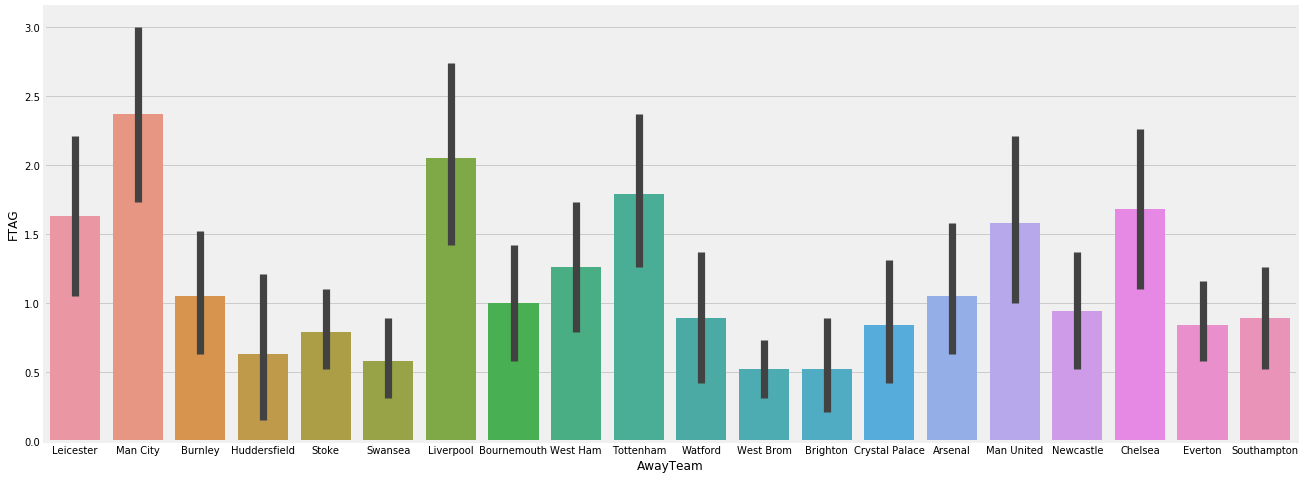

In [28]:
plt.figure(figsize=(20,8))

sns.barplot(x="AwayTeam", y="FTAG", data=data)
plt.show()

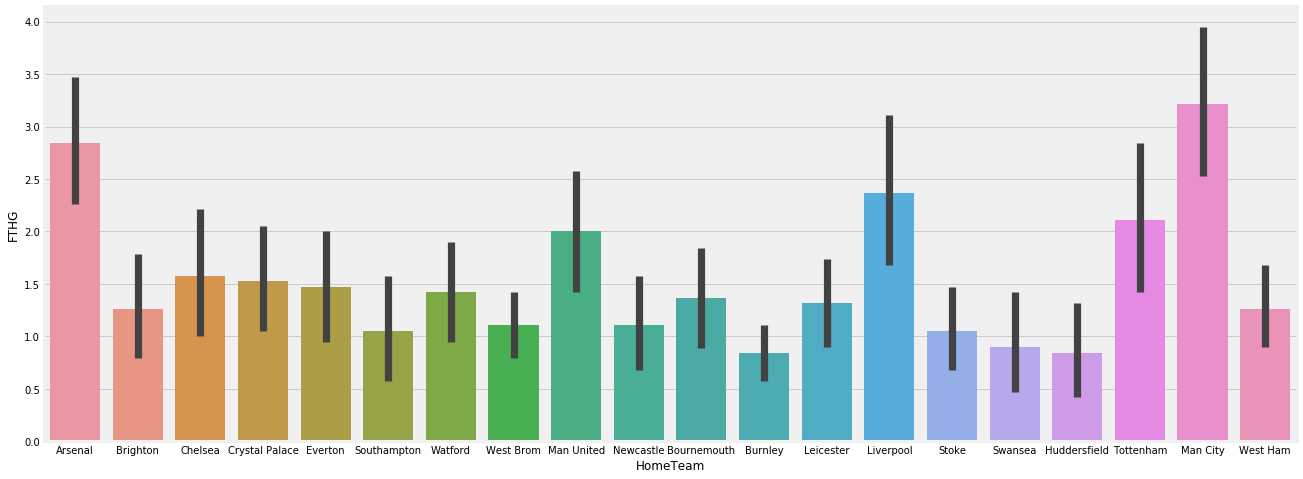

In [29]:
plt.figure(figsize=(20,8))

sns.barplot(x="HomeTeam", y="FTHG", data=data)
plt.show()

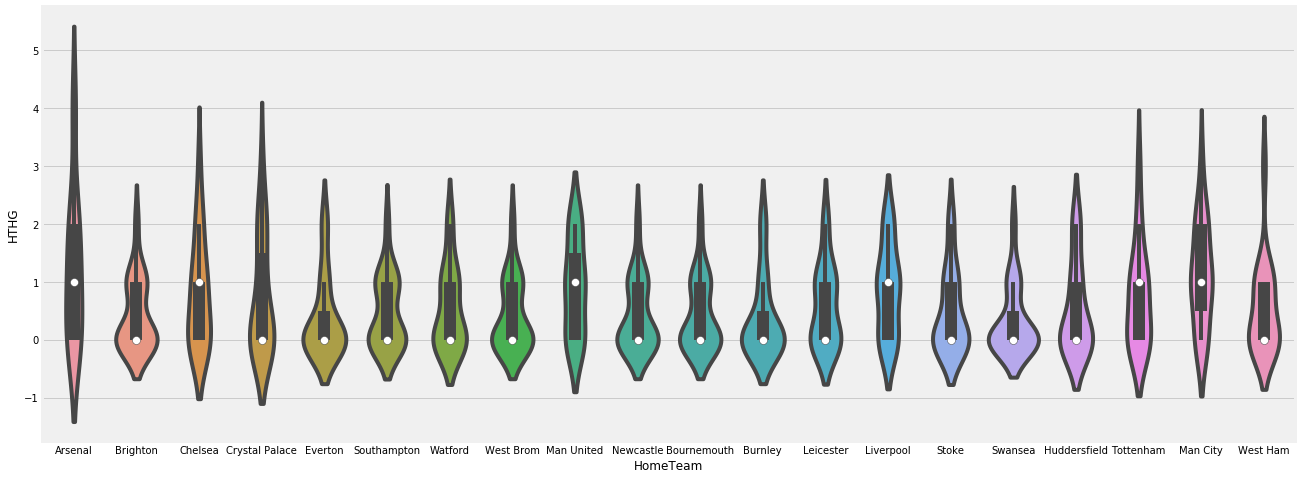

In [31]:
plt.figure(figsize=(20,8))

sns.violinplot(x="HomeTeam", y="HTHG", data=data)
plt.show()